In [16]:
"""
Created on Sat Mar 18 14:47:48 2023
https://data.cityofnewyork.us/City-Government/NYC-Jobs/kpav-sd4t
@author: benson
"""

'\nCreated on Sat Mar 18 14:47:48 2023\nhttps://data.cityofnewyork.us/City-Government/NYC-Jobs/kpav-sd4t\n@author: benson\n'

## Introduction

The dataset I am using is the City Government NYC Job listing from NYC DATA. Link source:(https://data.cityofnewyork.us/City-Government/NYC-Jobs/kpav-sd4t). 

This data set has multiple data types that allow me to play around and practice many things in Pandas—for example, Clean Null value, changing data type, etc.

Also, it can provide meaningful information on the current job posting for someone looking to change a career in an unpredictable economy.

There are many more detailed analyses from this dataset, like, job skills, Job category in demand, and more. But I will focus on the job salary in this analysis. 


Import Pandas and read CSV file into Pandas Dataframe

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('NYC_Jobs.csv')

In [19]:
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,576947,DEPARTMENT OF BUILDINGS,Internal,3,Plan Examiner,PLAN EXAMINER (BLDGS),Competitive-1,22410,00,"Engineering, Architecture, & Planning",...,You must be able to understand and be understo...,For Non-City/External Candidates: Visit the Ex...,NaN,CITYWIDE Unit assignment and work location are...,NaN,New York City Residency is not required for th...,03/01/2023,31-MAR-2023,03/01/2023,03/07/2023
1,564623,OFFICE OF LABOR RELATIONS,Internal,13,Data Processor,COMMUNITY ASSISTANT,Non-Competitive-5,56056,00,Administration & Human Resources,...,PLEASE NOTE: THIS IS A TEMPORARY POSITION UNT...,TO APPLY PLEASE SUBMIT YOUR COVER LETTER AND R...,NaN,NaN,NaN,New York City residency is generally required ...,12/29/2022,NaN,03/06/2023,03/07/2023
2,533544,ADMIN FOR CHILDREN'S SVCS,External,1,"Security Consultant, Horizon",COMMUNITY COORDINATOR,Non-Competitive-5,56058,00,"Public Safety, Inspections, & Enforcement",...,Section 424-A of the New York Social Services ...,Click on the Apply button now.,NaN,NaN,NaN,New York City residency is generally required ...,08/19/2022,NaN,08/19/2022,03/07/2023
3,545994,DEPARTMENT OF TRANSPORTATION,Internal,1,Civil Engineer Level -3,CIVIL ENGINEER,Competitive-1,20215,03,"Engineering, Architecture, & Planning",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,35 Hours,55 Water St Ny Ny,NaN,New York City Residency is not required for th...,09/27/2022,NaN,10/04/2022,03/07/2023
4,538672,HRA/DEPT OF SOCIAL SERVICES,External,1,"DIRECTOR, SNT PROGRAM",EXECUTIVE AGENCY COUNSEL,Non-Competitive-5,95005,M2,Administration & Human Resources Constituent S...,...,**LOAN FORGIVENESS The federal government pro...,Click Apply Now Button,Monday to Friday: 9 - 5.,NaN,NaN,New York City residency is generally required ...,07/15/2022,NaN,12/12/2022,03/07/2023


 # Data Wrangling 
 Display the data type

In [20]:
df.dtypes

Job ID                             int64
Agency                            object
Posting Type                      object
# Of Positions                     int64
Business Title                    object
Civil Service Title               object
Title Classification              object
Title Code No                     object
Level                             object
Job Category                      object
Full-Time/Part-Time indicator     object
Career Level                      object
Salary Range From                float64
Salary Range To                  float64
Salary Frequency                  object
Work Location                     object
Division/Work Unit                object
Job Description                   object
Minimum Qual Requirements         object
Preferred Skills                  object
Additional Information            object
To Apply                          object
Hours/Shift                       object
Work Location 1                   object
Recruitment Cont

1) Modify multiple column names.

In [21]:
rename_dict = {'# Of Positions': 'Number of Position', 'Full-Time/Part-Time indicator': 'Job Type'}
df = df.rename(columns=rename_dict)

2) Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.
Convert the string to date data type

In [22]:
df['Posting Date'] = pd.to_datetime(df['Posting Date'])
df['Posting Updated'] = pd.to_datetime(df['Posting Updated'])
df['Process Date'] = pd.to_datetime(df['Process Date'])


3) Fix missing and invalid values in data.
Check any Null Value and drop it in #6

In [23]:
print(df.isna().any(axis=0))

# Check number of records
num_rows = len(df)

Job ID                       False
Agency                       False
Posting Type                 False
Number of Position           False
Business Title               False
Civil Service Title          False
Title Classification         False
Title Code No                False
Level                        False
Job Category                  True
Job Type                      True
Career Level                  True
Salary Range From            False
Salary Range To              False
Salary Frequency             False
Work Location                False
Division/Work Unit           False
Job Description              False
Minimum Qual Requirements     True
Preferred Skills              True
Additional Information        True
To Apply                     False
Hours/Shift                   True
Work Location 1               True
Recruitment Contact           True
Residency Requirement        False
Posting Date                 False
Post Until                    True
Posting Updated     

4) Create new columns based on existing columns or calculations.

In [24]:
df['Average Salary'] = (df['Salary Range From'] + df['Salary Range To'] )/2
df['Job Category Type'] = df['Job Category'].str.extract('(\w+)')


5) Drop column(s) from your dataset.
Drop Unused Column

In [25]:
df = df.drop('Post Until', axis=1)
df = df.drop('Recruitment Contact', axis=1)
df = df.drop('Work Location 1', axis=1)
df = df.drop('Additional Information', axis=1)
df = df.drop('Hours/Shift', axis=1)

6) Drop a row(s) from your dataset.
Drop Nan Records

In [26]:
df = df.dropna()

# 6303 - 5164 = 1139 row removed for incomplete records 
num_rows_updated = len(df)

7) Sort your data based on multiple variables.
8) Filter your data based on some condition.
create new dataframe for some specific analysis (filtering and sorting)

In [27]:
#only full time job with annual salary listing is used here.
job_ft_salary_df = df[(df["Job Type"]=='F') & (df["Salary Frequency"] == "Annual")] 

job_ft_salary_df = job_ft_salary_df.loc[:, ['Job Category Type', 'Average Salary', 'Career Level']]
job_ft_salary_df = job_ft_salary_df.sort_values(["Job Category Type", "Average Salary"],ascending =[True,True])


9) Convert all the string values to upper or lower cases in one column.

In [28]:
job_ft_salary_df['Job Category Type'] = df['Job Category Type'].str.upper()

10) Check whether numeric values are present in a given column of your dataframe.

In [29]:
is_numeric = pd.to_numeric(job_ft_salary_df['Average Salary'], errors='coerce').notnull().all()



11) Group your dataset by one column, and get the mean, min, and max values by group.
        Groupby()
        agg() or .apply()

# Data Exploration

    table 1

In [30]:
result = job_ft_salary_df.groupby('Job Category Type').agg({'Average Salary': ['mean', 'min', 'max']})

print(result)

                  Average Salary                   
                            mean      min       max
Job Category Type                                  
ADMINISTRATION      81760.297170  37979.5  212500.0
BUILDING            65267.603385  37609.5  119204.0
CLERICAL            42398.000000  40195.0   45694.5
COMMUNICATIONS      91067.021898  39119.0  184335.5
CONSTITUENT         67768.296733  34959.0  174081.5
ENGINEERING         86418.015351  52923.0  231796.0
FINANCE             86355.837500  39119.0  227449.0
HEALTH              70817.960967  31377.0  175153.0
INFORMATION         97312.250000  85211.5  109413.0
LEGAL               79749.354756  37979.5  185000.0
POLICY              83484.571795  41666.5  162500.0
PUBLIC              71528.486425  29561.0  213783.0
SOCIAL              71191.697778  34834.0  192500.0
TECHNOLOGY          94834.736254  37500.0  185000.0


12) Group your dataset by two columns and then sort the aggregated results within the groups.


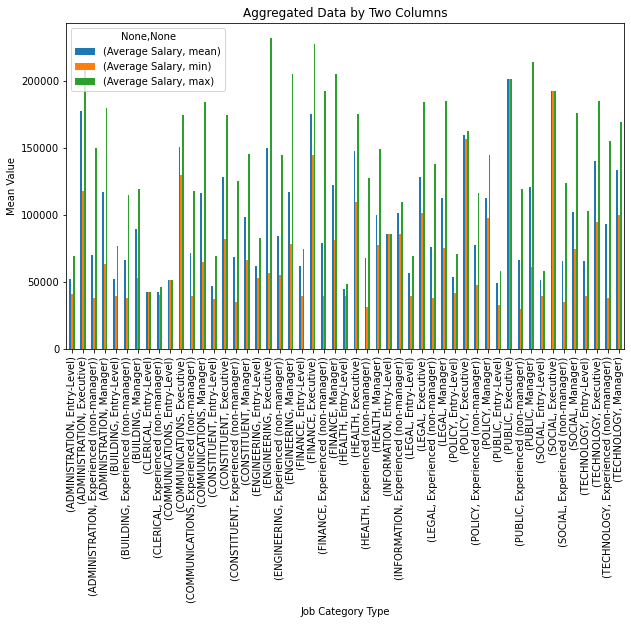

In [31]:
result2 = job_ft_salary_df.groupby(['Job Category Type','Career Level']).agg({'Average Salary': ['mean', 'min', 'max']})

result2.plot(kind='bar', figsize=(10, 6))
plt.title('Aggregated Data by Two Columns')
plt.xlabel('Job Category Type')
plt.ylabel('Mean Value')
plt.show()

# Conclusions

I grouped many jobs into category 14 job types to find the average salary offering. The mean, min, and max salary results show some salary you can expect to earn from this job type. In table 1, the CLERICAL is offered the least average salary, and INFORMATION SYSTEM offers the most average salary.

But we can notice the massive gap between Min's and Max's salaries. So I break down the career level (Job Title) to better understand each job category(Graph above). If you are looking for a new career (Entry Level), PUBLIC SAFETY, SOCIAL SERVICE, and POLICY RESEARCH are giving pretty good opportunities. Although they offer around 50k salary for entry-level, they have significant promotion opportunities to around 200k salary at the executive level, which is a big jump compared to other jobs.